In [12]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/sibylhe/mmm_stan/main/data.csv")

# 1. media variables
channel_columns_raw = [
    col
    for col in raw_df.columns
    if "mdsp_" in col
    and col != "mdsp_viddig"
    and col != "mdsp_auddig"
    and col != "mdsp_sem"
]

# 2. control variables
control_columns = [col for col in raw_df.columns if "hldy_" in col]

# 3. sales variables
sales_cols = ["sales"]

data_df = raw_df[["wk_strt_dt", *sales_cols, *channel_columns_raw, *control_columns]]
data_df = data_df.rename(
    columns={
        "mdsp_dm": "Direct Mail",
        "mdsp_inst": "Insert",
        "mdsp_nsp": "Newspaper",
        "mdsp_audtr": "Radio",
        "mdsp_vidtr": "TV",
        "mdsp_so": "Social Media",
        "mdsp_on": "Online Display",
    }
)

channel_columns = [
    "Direct Mail",
    "Insert",
    "Newspaper",
    "Radio",
    "TV",
    "Social Media",
    "Online Display",
]

# . Date column
data_df["wk_strt_dt"] = pd.to_datetime(data_df["wk_strt_dt"])

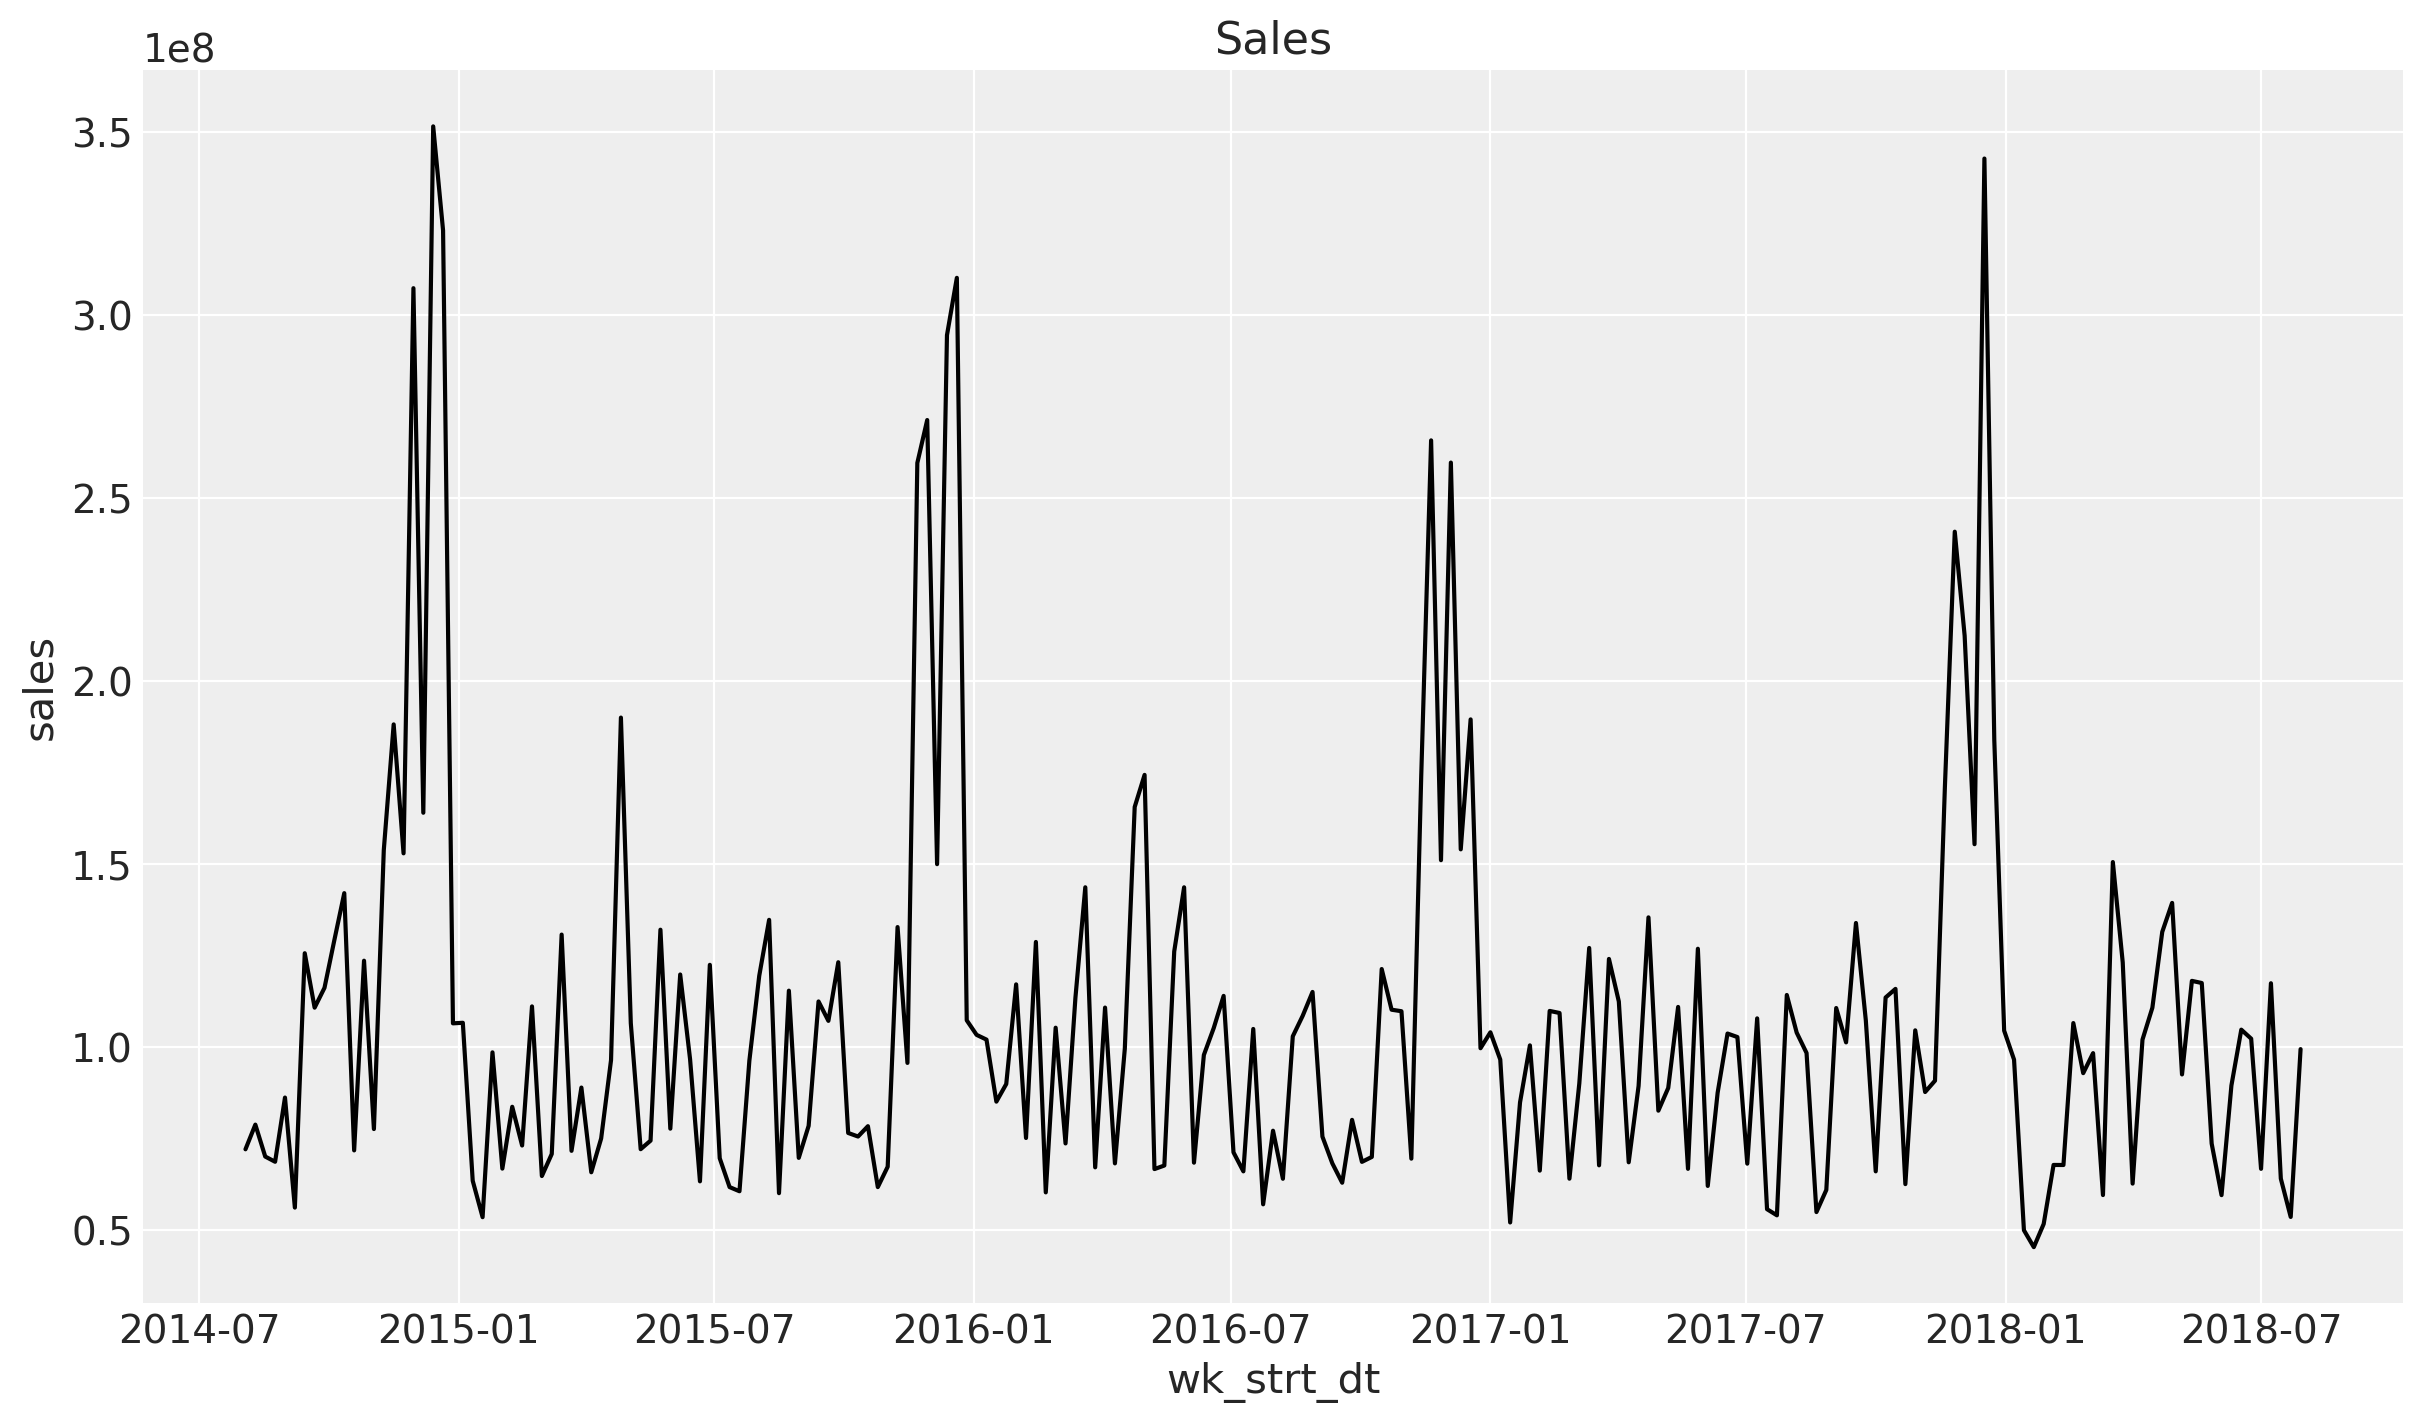

In [15]:
fig, ax = plt.subplots()
sns.lineplot(data=data_df, x="wk_strt_dt", y="sales", color="black", ax=ax)
ax.set(title="Sales");

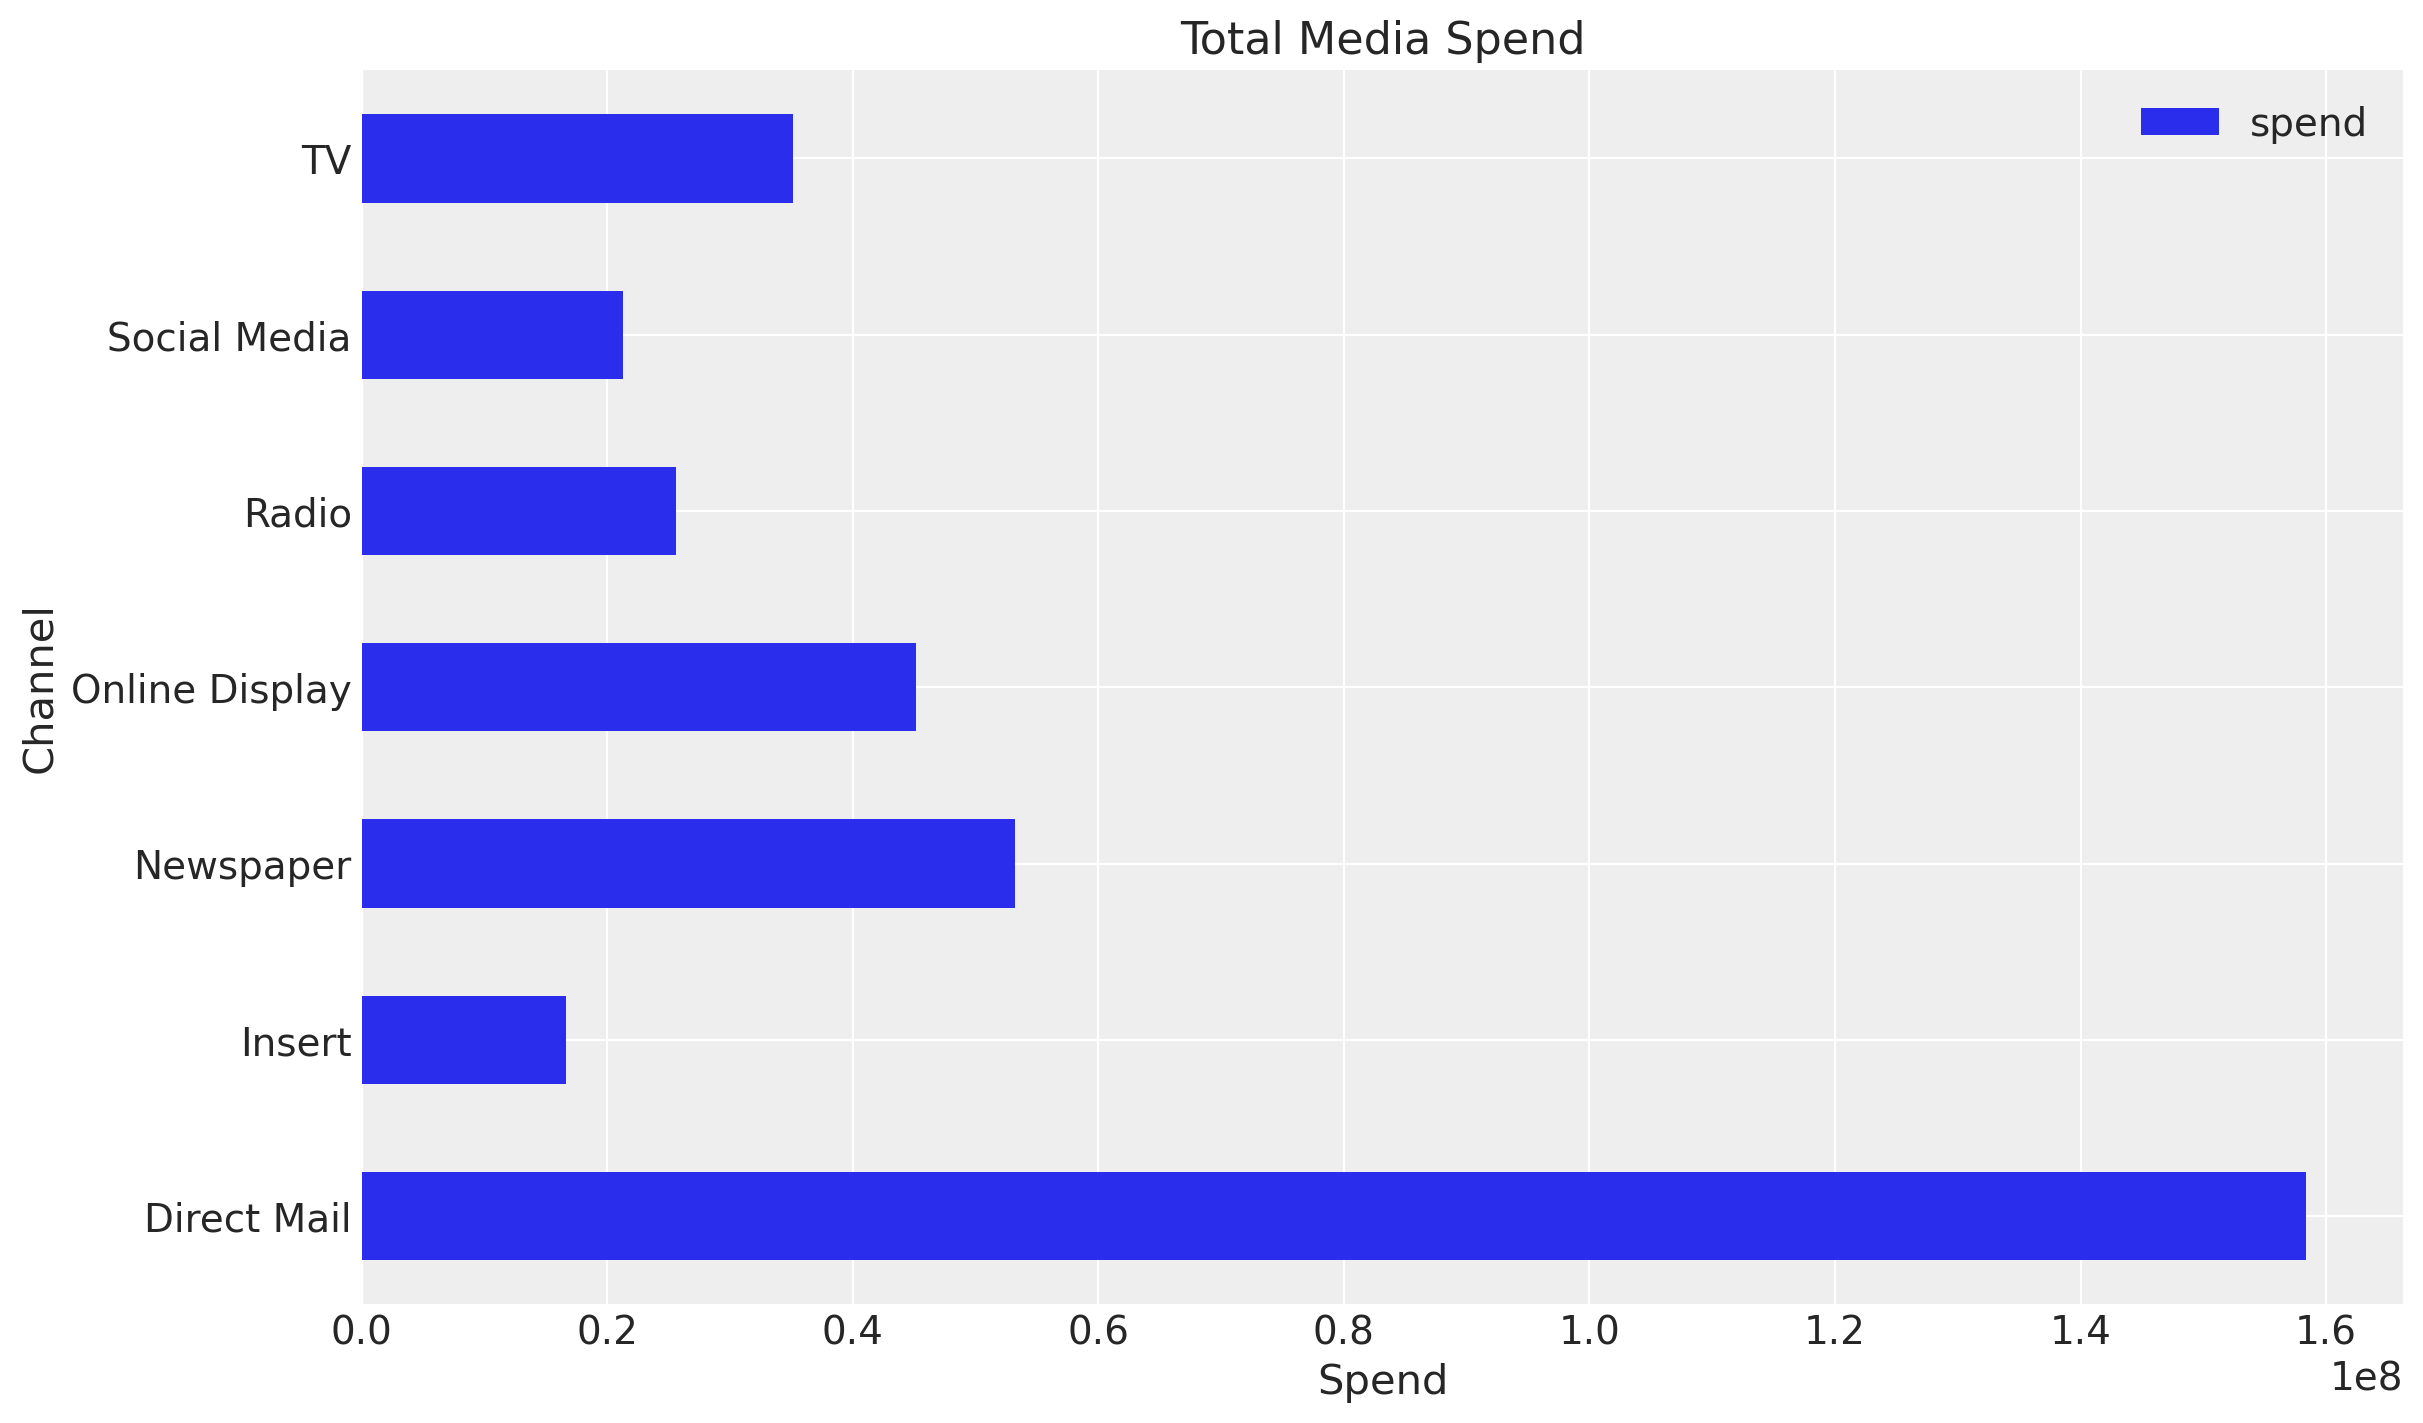

In [30]:
fig, ax = plt.subplots()
data_df.melt(
    value_vars=channel_columns, var_name="channel", value_name="spend"
).groupby("channel").agg({"spend": "sum"}).plot.barh(ax=ax)
ax.set(title="Total Media Spend", xlabel="Spend", ylabel="Channel");

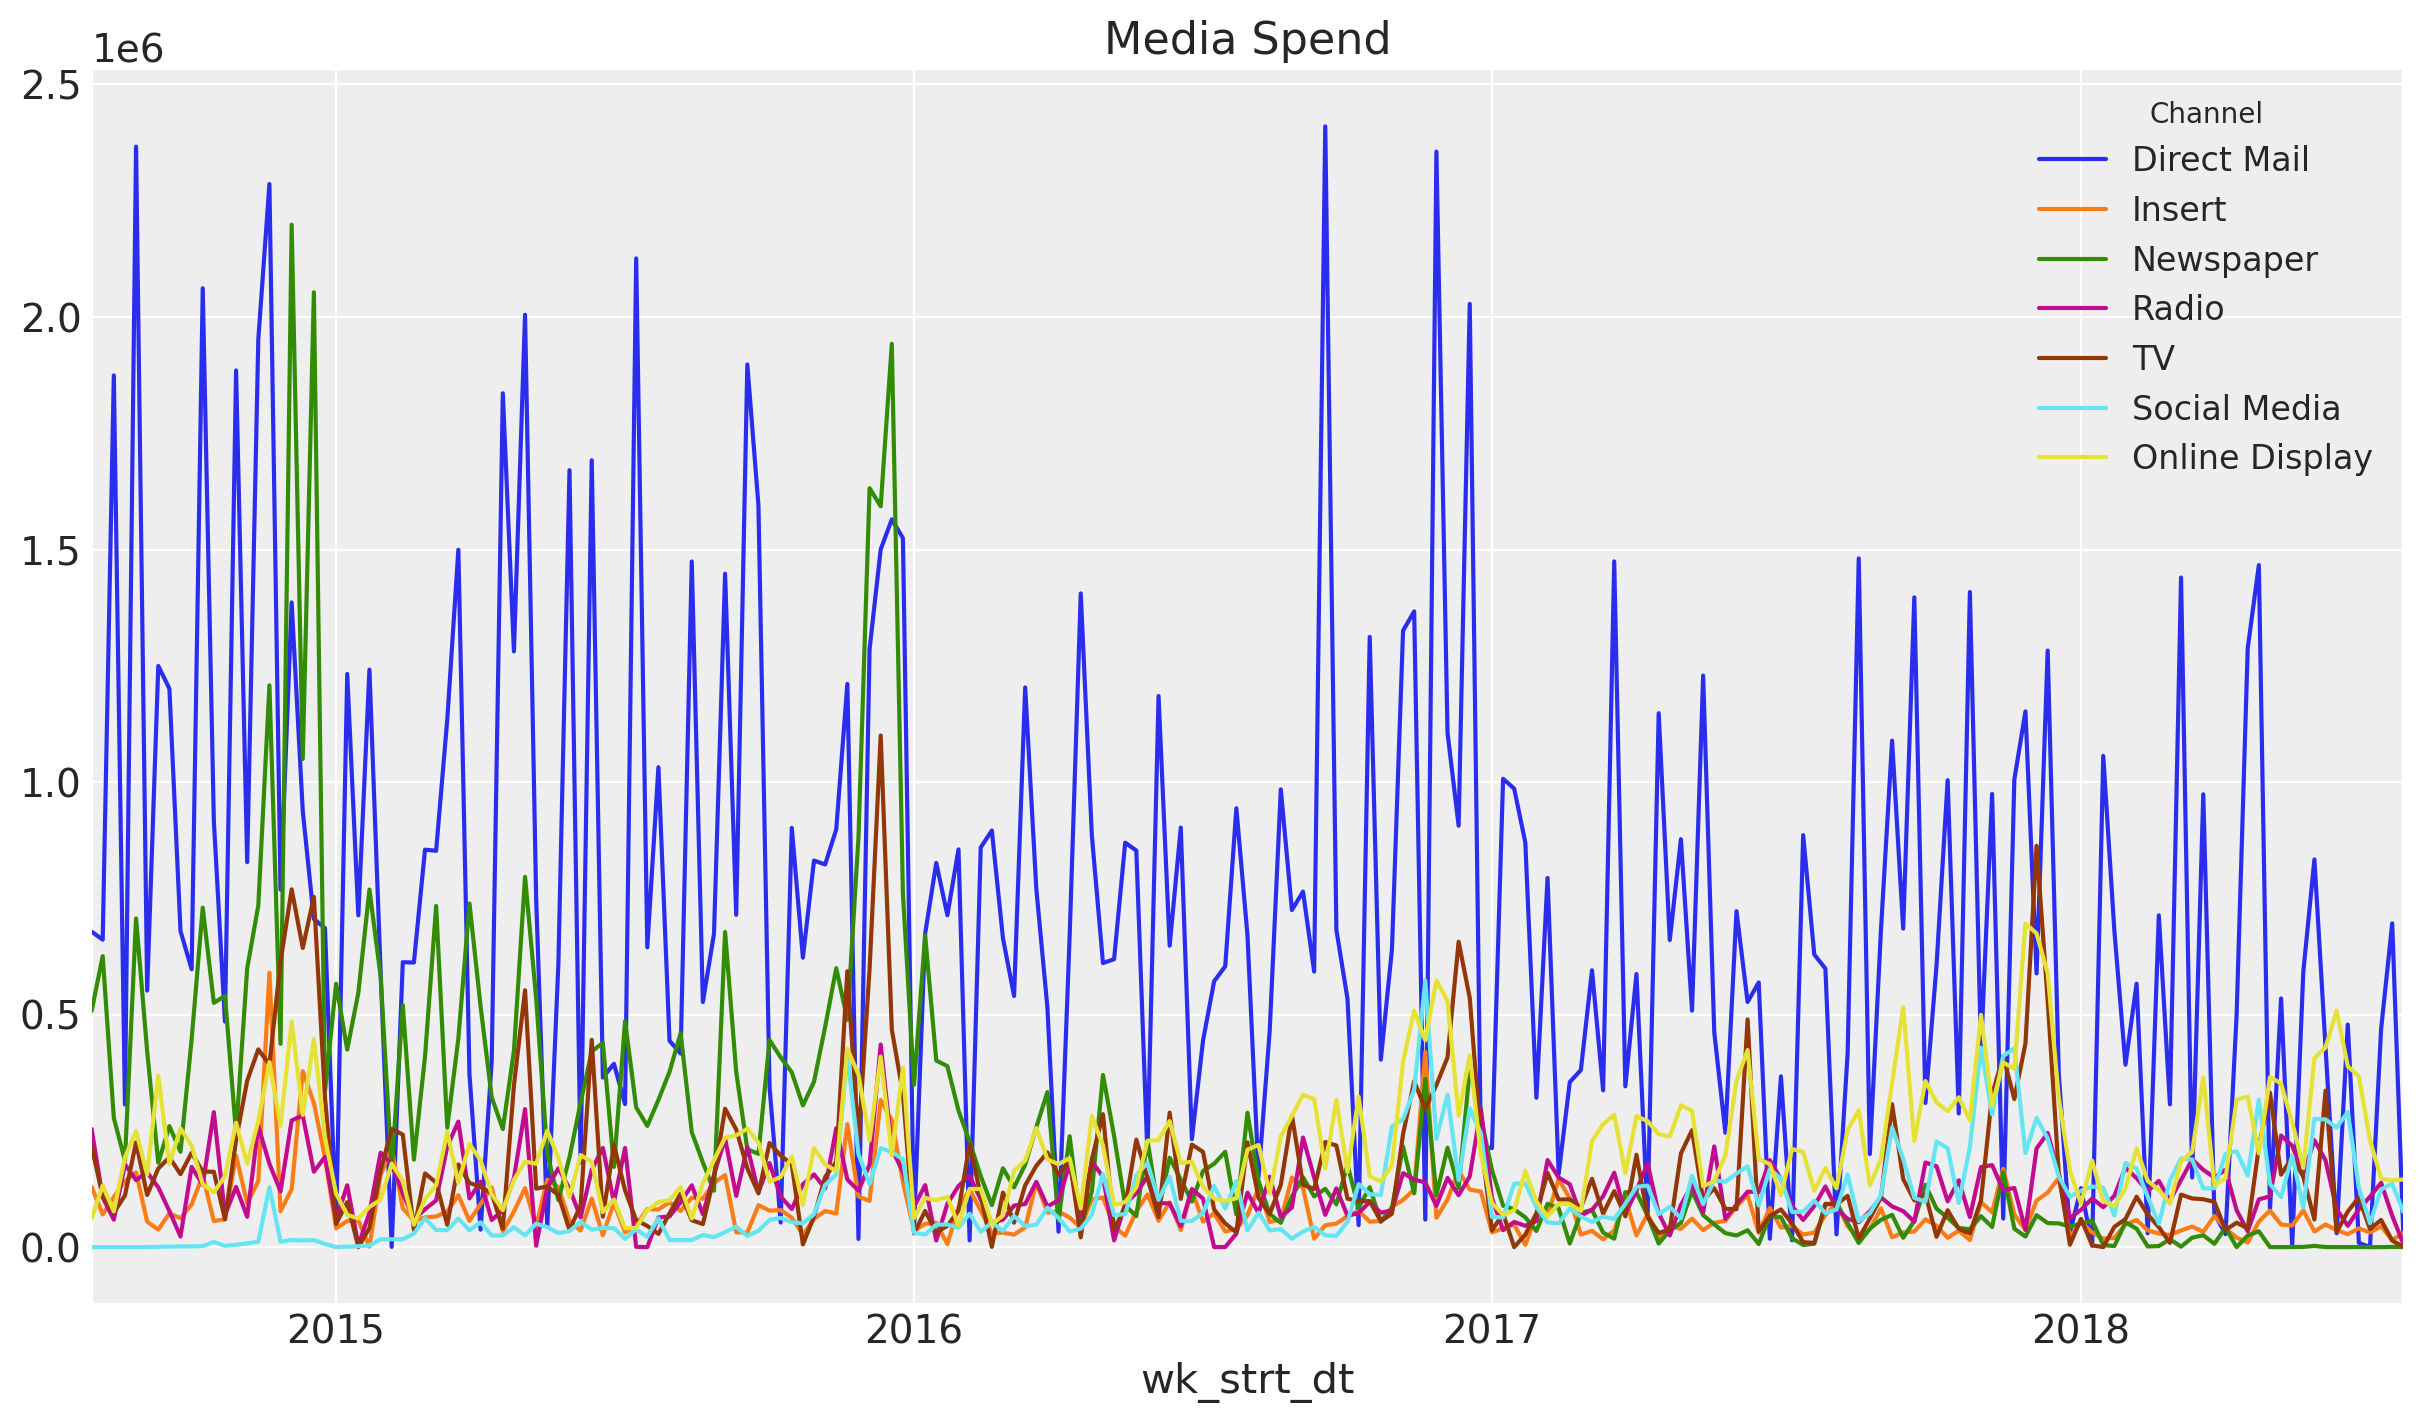

In [34]:
fig, ax = plt.subplots()
data_df.set_index("wk_strt_dt")[channel_columns].plot(ax=ax)
ax.legend(title="Channel", fontsize=12)
ax.set(title="Media Spend");

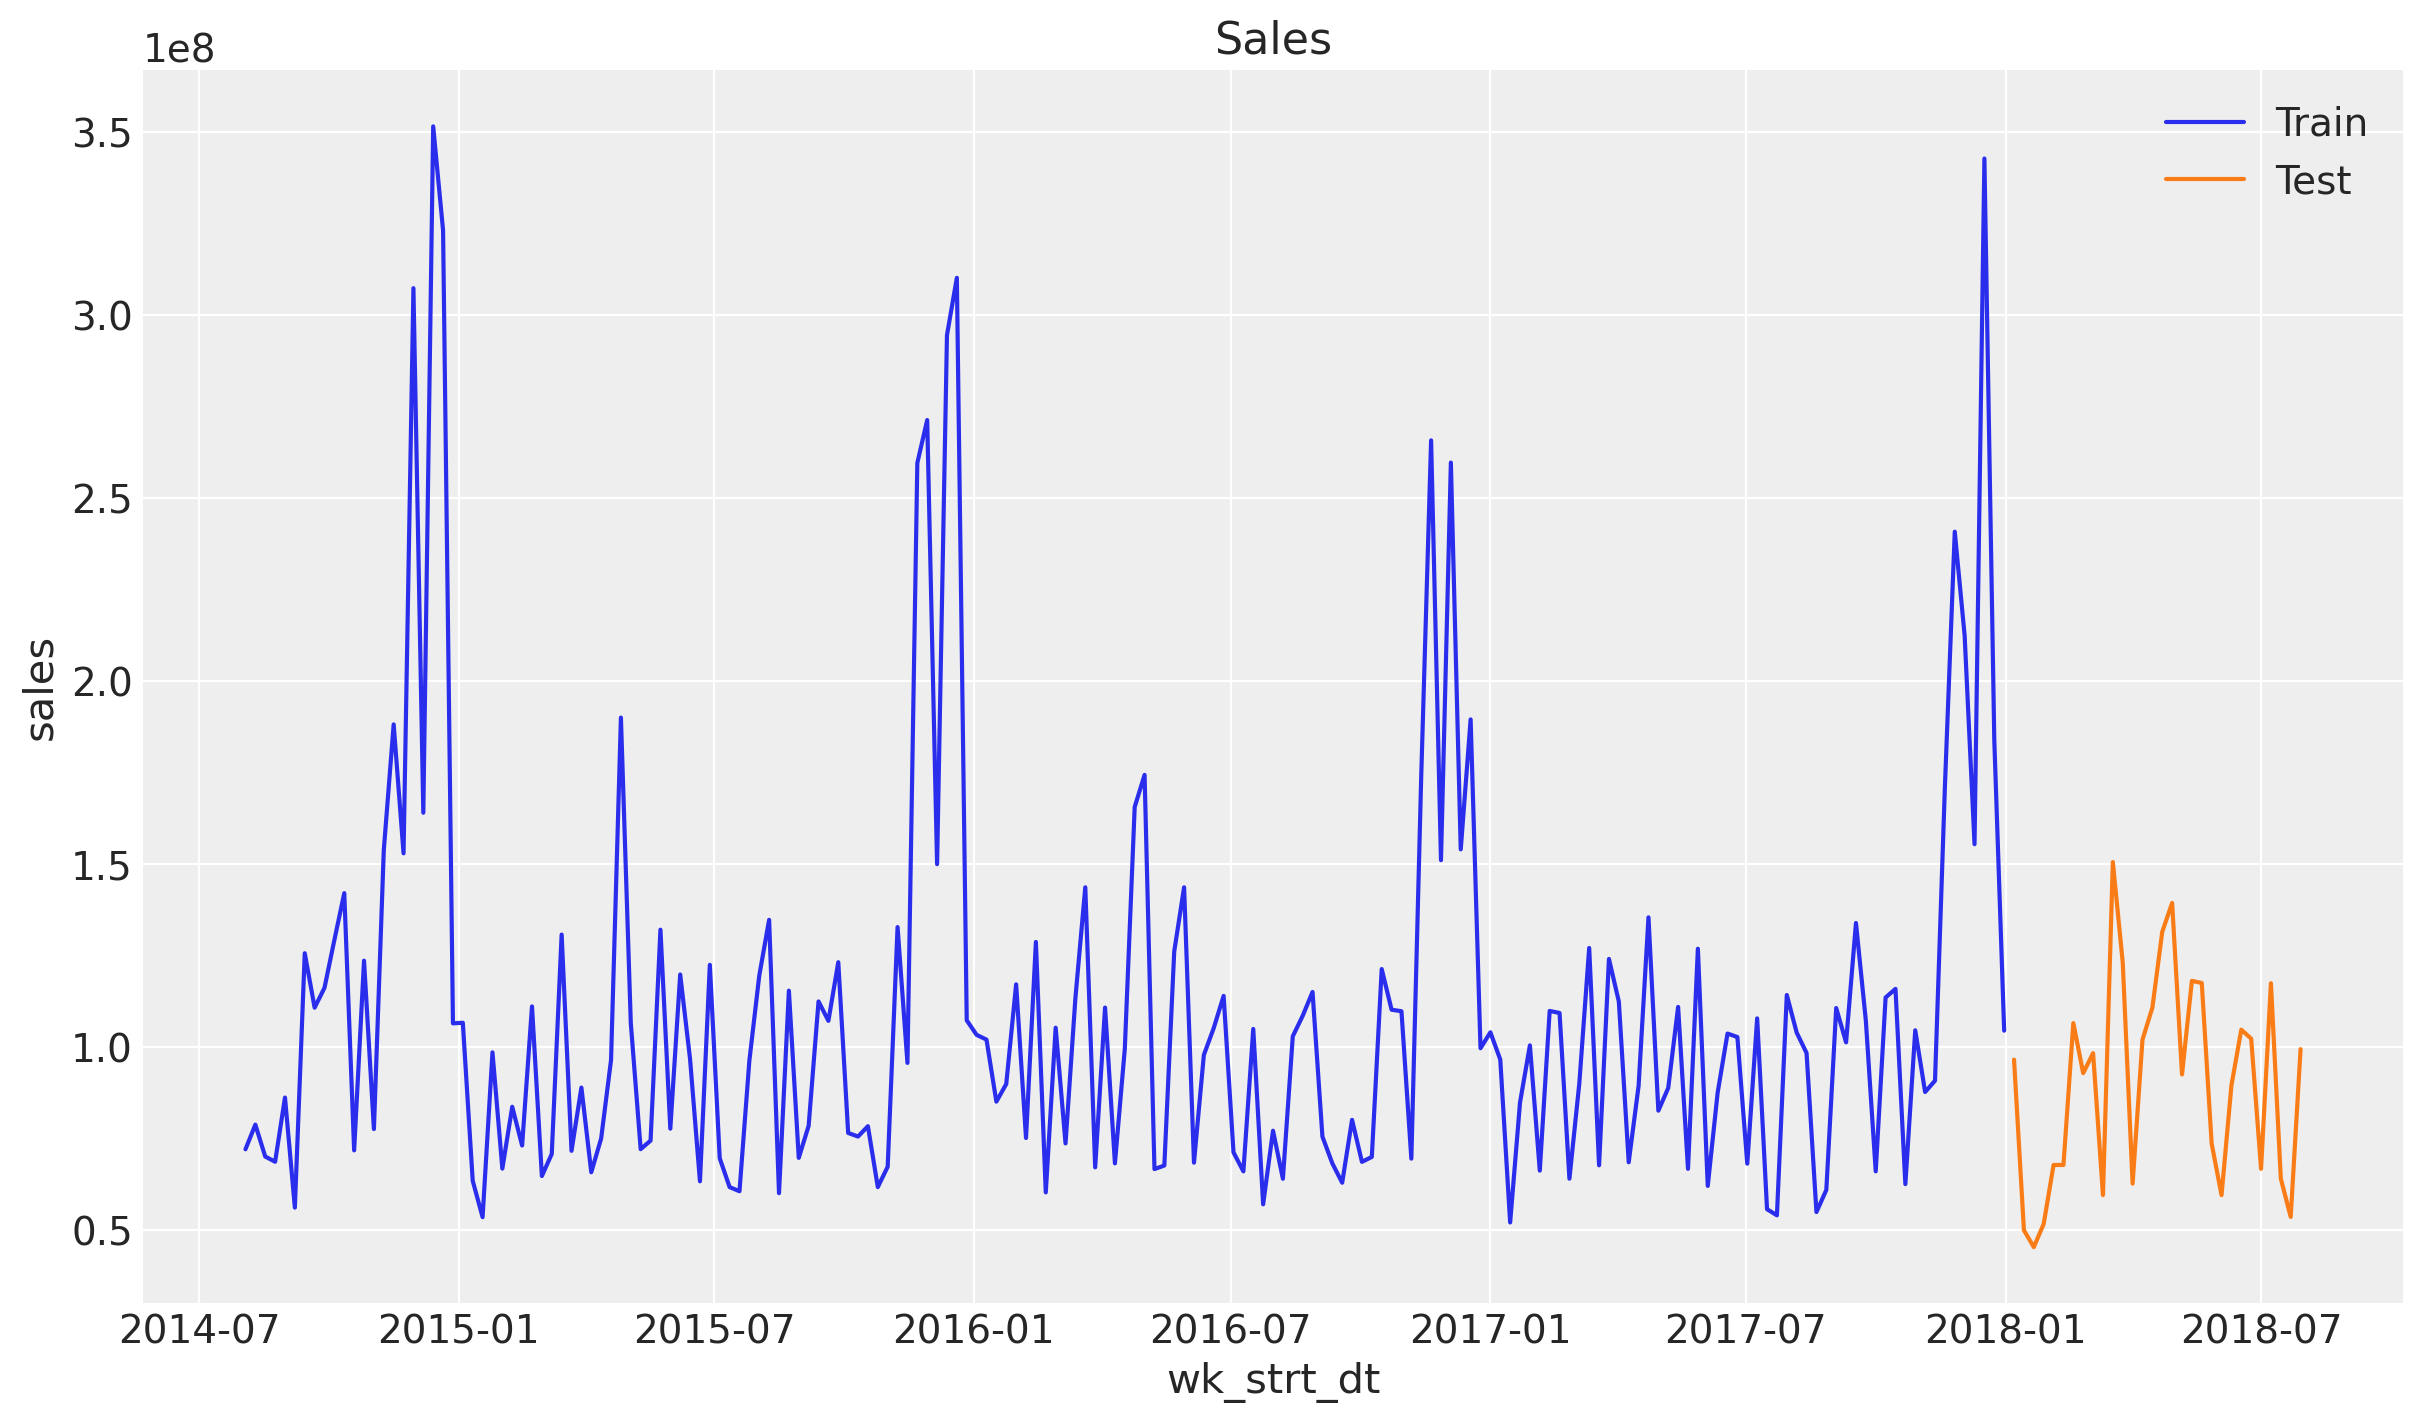

In [36]:
train_test_split_date = pd.to_datetime("2017-12-31")

train_mask = data_df.wk_strt_dt <= train_test_split_date
test_mask = data_df.wk_strt_dt > train_test_split_date

train_df = data_df[train_mask]
test_df = data_df[test_mask]

fig, ax = plt.subplots()
sns.lineplot(data=train_df, x="wk_strt_dt", y="sales", color="C0", label="Train", ax=ax)
sns.lineplot(data=test_df, x="wk_strt_dt", y="sales", color="C1", label="Test", ax=ax)
ax.set(title="Sales");